In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Variables

In [2]:
T_e=1
T=100
sigma_Q=1
sigma_px=30
sigma_py=30

In [3]:
F=np.array([[1,T_e,0,0],[0,1,0,0],[0,0,1,T_e],[0,0,0,1]])
Q=sigma_Q*np.array([[T_e**3/3,T_e**2/2,0,0],[T_e**2/2,T_e,0,0],[0,0,T_e**3/3,T_e**2/2],[0,0,T_e**2,T_e]])
H=np.array([[1,0,0,0],[0,0,1,0]])
R=np.array([[sigma_px**2,0],[0,sigma_py**2]])

In [4]:
x_init=np.array([[3],[40],[-4],[20]])
x_kalm=x_init
P_kalm=np.identity(4)

# Fonctions

In [7]:
def creer_trajectoire(F=F,Q=Q,x_init=x_init,T=T):
    x=x_init
    vecteur_x=np.zeros((4,T))
    for n in range(T):
        U=np.random.multivariate_normal([0,0,0,0],Q).reshape((4,1))
        x=F@x+U
        vecteur_x[:,n]=x.reshape((4,))
    return vecteur_x
vecteur_x=creer_trajectoire()

/tmp/ipykernel_1020073/1059972482.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  U=np.random.multivariate_normal([0,0,0,0],Q).reshape((4,1))


In [8]:
def creer_observation(H=H,R=R,vecteur_x=vecteur_x,T=T):
    vecteur_y=np.zeros((2,T))
    for n in range(T):
        x=vecteur_x[:,n]
        V=np.random.multivariate_normal([0,0],R).reshape((2,1))
        y=H@x+V.T
        vecteur_y[:,n]=y.reshape((2,))
    return vecteur_y

# Main

In [9]:
vecteur_x=creer_trajectoire()
vecteur_y=creer_observation()

/tmp/ipykernel_1020073/1059972482.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  U=np.random.multivariate_normal([0,0,0,0],Q).reshape((4,1))


In [25]:
dfx=pd.DataFrame(vecteur_x.T,columns=['px','px.','py','py.'])
dfy=pd.DataFrame(vecteur_y.T,columns=['Opx','Opy'])
df=pd.concat([dfx,dfy],axis=1)

In [17]:
df

,px,px.,py,py.,Opx,Opy
0,43.458173,40.425865,16.473232,21.373739,41.365871,21.106460
1,84.188800,41.147266,38.160871,22.107590,91.165087,60.907123
2,126.656713,43.500770,61.316122,23.130764,157.542833,57.109568
3,169.655623,41.967664,82.608898,21.337507,145.850397,107.779970
4,211.238537,41.380800,102.780797,20.360707,216.923279,65.726729
...,...,...,...,...,...,...
95,4064.309940,50.983110,1491.580791,19.689286,4509.209288,1955.895551
96,4114.648398,50.006512,1512.334473,20.270683,4545.526639,1930.926528
97,4165.134194,50.939387,1531.602983,18.839444,4579.450595,1948.764871
98,4215.875870,50.098123,1549.729709,18.161212,4651.052264,1956.522982


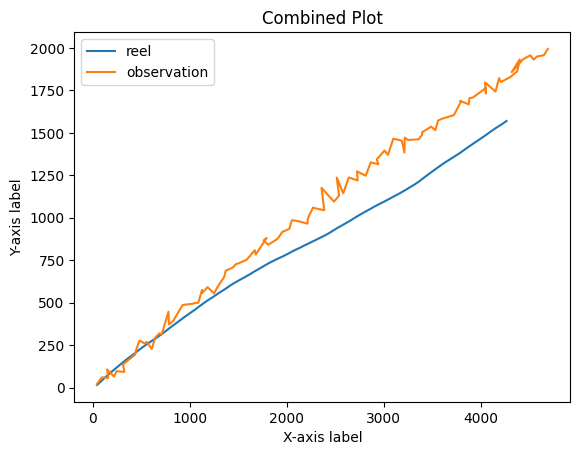

In [27]:
# Assuming df is your DataFrame
plt.plot(df['px'], df['py'], label='reel')
plt.plot(df['Opx'], df['Opy'], label='observation')

# Set labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Combined Plot')

# Show legend
plt.legend()

# Show the plot
plt.show()
